In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os

import yfinance as yf


from statsmodels.tsa.holtwinters import ExponentialSmoothing

from statsmodels.tsa.seasonal import seasonal_decompose

nvda = yf.Ticker("NVDA")
df = nvda.history(start="2020-01-01")
#df.head()

df = df.asfreq('b')
df = df.ffill()
df.index = df.index.tz_convert(None)

series = df.Close

# Use statsmodels to decompose
period = 7

size = int(len(series) * 0.8)
train, test = series[:size], series[size:size+50]

#exponential smoothing
expo = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=period, initialization_method="estimated")
results_expo = expo.fit()
#results_expo.summary()
results_expo.predict(start=test.index[0], end=test.index[-1])

2023-03-24 05:00:00    271.066714
2023-03-27 05:00:00    272.235787
2023-03-28 05:00:00    272.531576
2023-03-29 05:00:00    272.758191
2023-03-30 05:00:00    272.078872
2023-03-31 05:00:00    272.539628
2023-04-03 05:00:00    273.436886
2023-04-04 05:00:00    272.862612
2023-04-05 05:00:00    274.031685
2023-04-06 05:00:00    274.327473
2023-04-07 05:00:00    274.554088
2023-04-10 05:00:00    273.874770
2023-04-11 05:00:00    274.335526
2023-04-12 05:00:00    275.232784
2023-04-13 05:00:00    274.658510
2023-04-14 05:00:00    275.827582
2023-04-17 05:00:00    276.123371
2023-04-18 05:00:00    276.349986
2023-04-19 05:00:00    275.670668
2023-04-20 05:00:00    276.131424
2023-04-21 05:00:00    277.028681
2023-04-24 05:00:00    276.454408
2023-04-25 05:00:00    277.623480
2023-04-26 05:00:00    277.919269
2023-04-27 05:00:00    278.145884
2023-04-28 05:00:00    277.466566
2023-05-01 05:00:00    277.927322
2023-05-02 05:00:00    278.824579
2023-05-03 05:00:00    278.250306
2023-05-04 05:

In [ ]:
train.head(10)

Date
2020-01-02 05:00:00    59.744038
2020-01-03 05:00:00    58.787781
2020-01-06 05:00:00    59.034317
2020-01-07 05:00:00    59.749027
2020-01-08 05:00:00    59.861084
2020-01-09 05:00:00    60.518509
2020-01-10 05:00:00    60.842255
2020-01-13 05:00:00    62.749794
2020-01-14 05:00:00    61.579369
2020-01-15 05:00:00    61.153530
Freq: B, Name: Close, dtype: float64

In [ ]:
a=results_expo.predict(start=test.index[0], end=test.index[-1])

In [ ]:
test.head(10)

2023-03-24 05:00:00+00:00    271.074817
2023-03-27 05:00:00+00:00    272.242427
2023-03-28 05:00:00+00:00    272.538056
2023-03-29 05:00:00+00:00    272.759153
2023-03-30 05:00:00+00:00    272.082216
2023-03-31 05:00:00+00:00    272.540398
2023-04-03 05:00:00+00:00    273.439166
2023-04-04 05:00:00+00:00    272.865601
2023-04-05 05:00:00+00:00    274.033210
2023-04-06 05:00:00+00:00    274.328840
2023-04-07 05:00:00+00:00    274.549937
2023-04-10 05:00:00+00:00    273.872999
2023-04-11 05:00:00+00:00    274.331182
2023-04-12 05:00:00+00:00    275.229950
2023-04-13 05:00:00+00:00    274.656384
2023-04-14 05:00:00+00:00    275.823994
2023-04-17 05:00:00+00:00    276.119623
2023-04-18 05:00:00+00:00    276.340720
2023-04-19 05:00:00+00:00    275.663783
2023-04-20 05:00:00+00:00    276.121965
2023-04-21 05:00:00+00:00    277.020733
2023-04-24 05:00:00+00:00    276.447168
2023-04-25 05:00:00+00:00    277.614777
2023-04-26 05:00:00+00:00    277.910407
2023-04-27 05:00:00+00:00    278.131504


In [ ]:
def bollinger(df, window=20, std=1.9):
    rolling_mean = df.rolling(window=window).mean()
    rolling_std = df.rolling(window=window).std()

    upper_band = rolling_mean + (rolling_std*std)
    lower_band = rolling_mean - (rolling_std*std)

    return rolling_mean, upper_band, lower_band

In [ ]:
rolling_mean, upper_band, lower_band = bollinger(test)

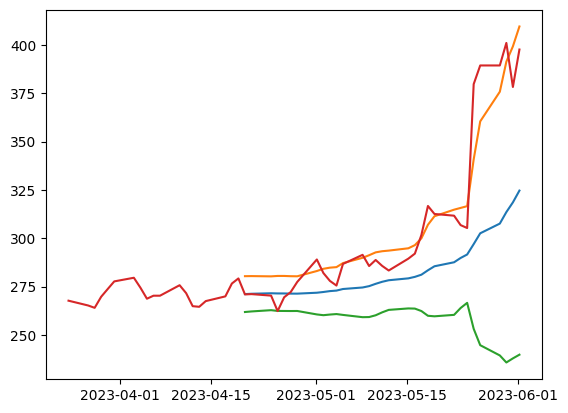

In [ ]:
plt.plot(rolling_mean)
plt.plot(upper_band)
plt.plot(lower_band)
plt.plot(test)

In [ ]:
df_bollinger = pd.concat([test, rolling_mean, upper_band, lower_band], axis=1)
df_bollinger.columns = ['Price', 'Rolling Mean', 'Upper Band', 'Lower Band']
df_bollinger

,Price,Rolling Mean,Upper Band,Lower Band
Date,,,,
2023-03-24 04:00:00,267.716705,NaN,NaN,NaN
2023-03-27 04:00:00,265.237396,NaN,NaN,NaN
2023-03-28 04:00:00,264.027710,NaN,NaN,NaN
2023-03-29 04:00:00,269.766144,NaN,NaN,NaN
2023-03-30 04:00:00,273.755035,NaN,NaN,NaN
2023-03-31 04:00:00,277.693939,NaN,NaN,NaN
2023-04-03 04:00:00,279.573425,NaN,NaN,NaN
2023-04-04 04:00:00,274.454834,NaN,NaN,NaN
2023-04-05 04:00:00,268.736420,NaN,NaN,NaN


From Bollinger band, it would buy when price is lower than lower band on 2023-04-25 at price = 262.338165, and sell when the price is higher than upper band on 2023-05-01 at price = 289.020874. This would mean a profit of 10%

In [ ]:
a.head(28)

2023-03-24 05:00:00    271.066714
2023-03-27 05:00:00    272.235787
2023-03-28 05:00:00    272.531576
2023-03-29 05:00:00    272.758191
2023-03-30 05:00:00    272.078872
2023-03-31 05:00:00    272.539628
2023-04-03 05:00:00    273.436886
2023-04-04 05:00:00    272.862612
2023-04-05 05:00:00    274.031685
2023-04-06 05:00:00    274.327473
2023-04-07 05:00:00    274.554088
2023-04-10 05:00:00    273.874770
2023-04-11 05:00:00    274.335526
2023-04-12 05:00:00    275.232784
2023-04-13 05:00:00    274.658510
2023-04-14 05:00:00    275.827582
2023-04-17 05:00:00    276.123371
2023-04-18 05:00:00    276.349986
2023-04-19 05:00:00    275.670668
2023-04-20 05:00:00    276.131424
2023-04-21 05:00:00    277.028681
2023-04-24 05:00:00    276.454408
2023-04-25 05:00:00    277.623480
2023-04-26 05:00:00    277.919269
2023-04-27 05:00:00    278.145884
2023-04-28 05:00:00    277.466566
2023-05-01 05:00:00    277.927322
2023-05-02 05:00:00    278.824579
Freq: B, dtype: float64

From Exponential smoothing, given a prediction of increased price on 4/26, it would buy on 4/25 at price = 262.338165. The predicted on 4/27 is higher than 4/26, so it would hold. The predicted price decreases on 4/28, so it will sell at price = 272.185486. The predicted price increases on 5/1, so it will buy again at price = 277.414032. On 5/2 the predicted price also increase, so it will hold at price = 289.020874 . During this period, there is a net gain of 8%, which equals (272.185486/262.338165*289.020874/277.414032 - 1)x100% , slightly lower than the bollinger band strategy.